<p style="text-align: center;"><img src="http://www.ucm.es/logo/ucm.png" alt="ucm" style="height: 100px;"/>   <img src="https://www.ucm.es/data/cont/media/www/pag-18458/logo_aocg.jpg" alt="aocg" style="height: 100px;"/>

&nbsp;

<div align="center"> 
<font size=5> Universidad Complutense de Madrid</font>
</div>
    
<div align="center"> 
<font size=4> Grupo Computense de Óptica Aplicada </font>
</div>
&nbsp;

&nbsp;

<div align="center"> 
<font size=6> DXFs </font>
</div>

<div align="center"> 
<font size=5> ejemplos de dibujos Hatch </font>
</div>


# Modules

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import ezdxf

from ezdxf import recover
from ezdxf.addons.drawing import RenderContext, Frontend
from ezdxf.addons.drawing.matplotlib import MatplotlibBackend

# Definitions

In [4]:
mm = 1.
inches = 25.4*mm
um = mm/1000
nm = um/1000
degrees = np.pi/180

In [5]:
dxf_params = dict(

    version="R2000",
    total_size=4*inches,
    num_masks=(4, 4),
    line_size=200*um
)

In [6]:
def start_drawing(**dxf_params):

    version = dxf_params['version']
    total_size = dxf_params['total_size']
    num_masks = dxf_params['num_masks']
    line_size = dxf_params['line_size']

    dwg = ezdxf.new(version)
    msp = dwg.modelspace()
    total_size = total_size
    num_masks = np.array(num_masks)
    line_size = line_size
    mask_size = (total_size)/np.array(num_masks)  # -5*line_size

    return dwg, msp, mask_size

In [7]:
def draw(dwg, msp):
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ctx = RenderContext(dwg)
    out = MatplotlibBackend(ax)
    Frontend(ctx, out).draw_layout(msp, finalize=True)

In [8]:
dxf_params = dict(

    version="R2000",
    total_size=4*inches,
    num_masks=(4, 4),
    line_size=5*um,
)

# Important info

1. hatch requires the DXF R2000 or later
1. By default a solid fill hatch with fill color=7 (white/black)

- 0 = nested: ezdxf.const.HATCH_STYLE_NESTED
- 1 = outer: ezdxf.const.HATCH_STYLE_OUTERMOST
- 2 = ignore: ezdxf.const.HATCH_STYLE_IGNORE

The first path has to set flag: 1 = external

flag const.BOUNDARY_PATH_POLYLINE is added (OR) automatically





# Circle

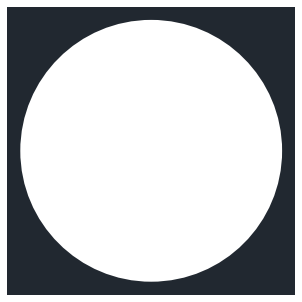

In [9]:
dwg, msp, mask_size = start_drawing(**dxf_params)
4
hatch = msp.add_hatch(
    dxfattribs={
        "hatch_style": ezdxf.const.HATCH_STYLE_NESTED,
        "color" : 7,
    })

edge_path = hatch.paths.add_edge_path()
edge_path.add_ellipse((0,0), major_axis=(10, 0), ratio=1)  # , flags=ezdxf.const.BOUNDARY_PATH_EXTERNAL)
draw(dwg, msp)

## Draw circles


In [10]:
dxf_params = dict(

    version="R2000",
    total_size=4*inches,
    num_masks=(4, 4),
    line_size=5*um,
)

In [11]:
size = 2*mm, 2*mm
r0 = np.array((0*mm, 0*mm))
radius = 0.4*mm

x = np.linspace(-2*mm, 2*mm, 5)
y = np.linspace(-2*mm, 2*mm, 5)
X, Y = np.meshgrid(x, y)
X = X.flatten()
Y = Y.flatten()

XY = np.array((X, Y)).transpose()

radii = radius * np.ones_like(X)


has_square = True

points0 = np.array([(-size[0]/2, -size[1]/2), (size[0]/2, -size[1]/2),
                    (size[0]/2, size[1]/2), (-size[0]/2, size[1]/2)])
# points0 = points0 + r0 + (size[0]/2, size[1]/2)

In [12]:

dwg, msp, mask_size = start_drawing(**dxf_params)

hatch = msp.add_hatch(
    dxfattribs={
        "hatch_style": ezdxf.const.HATCH_STYLE_NESTED,
        "color": 1,
    },
)

if has_square is True:4
    hatch.paths.add_polyline_path(points0)

 

edge_path = hatch.paths.add_edge_path()

for i, xy in enumerate(XY):
    edge_path.add_ellipse(xy, major_axis=(radii[i], 0), ratio=1)  # , flags=ezdxf.const.BOUNDARY_PATH_EXTERNAL)
    
draw(dwg, msp)    

IndentationError: unexpected indent (2742284749.py, line 11)

# Inserted circles

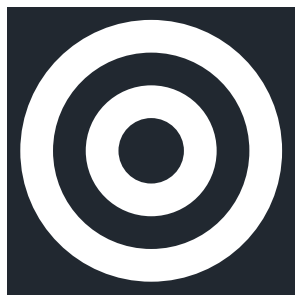

In [ ]:
dwg, msp, mask_size = start_drawing(**dxf_params)
hatch = msp.add_hatch(color=7)


edge_path = hatch.paths.add_edge_path(flags=ezdxf.const.BOUNDARY_PATH_DEFAULT)

edge_path.add_arc(
    center=(0, 0),
    radius=10,4
    start_angle=0,
    end_angle=360,
)

edge_path.add_arc(
    center=(0, 0),
    radius=7.5,
    start_angle=0,
    end_angle=360,
)

edge_path.add_arc(
    center=(0, 0),
    radius=5,
    start_angle=0,
    end_angle=360,
)

edge_path.add_arc(
    center=(0, 0),
    radius=2.5,
    start_angle=0,
    end_angle=360,
)

draw(dwg, msp)

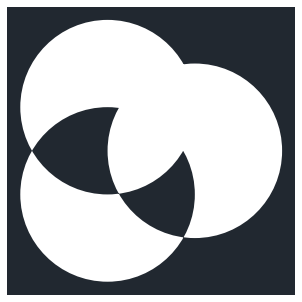

In [ ]:
dwg, msp, mask_size = start_drawing(**dxf_params)
hatch = msp.add_hatch(color=7)


edge_path = hatch.paths.add_edge_path(flags=0)

edge_path.add_arc(
    center=(10,5),
    radius=10,
    start_angle=0,
    end_angle=360,
)

edge_path.add_arc(
    center=(0, 0),
    radius=10,
    start_angle=0,
    end_angle=360,
)

edge_path.add_arc(
    center=(0, 10),
    radius=10,
    start_angle=0,
    end_angle=360,
)



draw(dwg, msp)

# Tipos de hatching

In [ ]:
def hatches_type(type_hatch):

    dwg, msp, mask_size = start_drawing(**dxf_params)


    hatch = msp.add_hatch(
        dxfattribs={"hatch_style": type_hatch}, 
                    color=7)


    hatch.paths.add_polyline_path(points0)
    edge_path = hatch.paths.add_edge_path()

    for i, xy in enumerate(XY):
        edge_path.add_ellipse(xy, major_axis=(radii[i], 0), ratio=1)  
        
    draw(dwg, msp)    

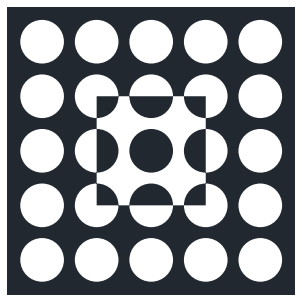

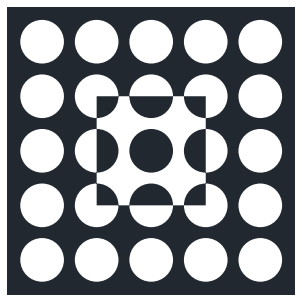

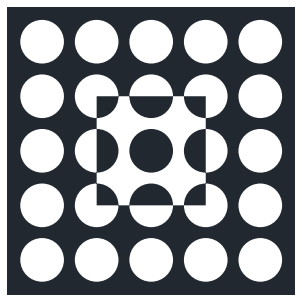

In [ ]:
hatches_type(ezdxf.const.HATCH_STYLE_NESTED)
hatches_type(ezdxf.const.HATCH_STYLE_OUTERMOST)
hatches_type(ezdxf.const.HATCH_STYLE_IGNORE)

# Draw polyline


## Square

In [ ]:
dwg, msp, mask_size = start_drawing(**dxf_params)
hatch = msp.add_hatch(color=7)
hatch.paths.add_polyline_path(
    [(0,0), (0,1), (1,1), (1,0)], is_closed=True)
draw(dwg, msp)


dwg.saveas('test.dxf')


NameError: name 'start_drawing' is not defined

## Crossed Polyline


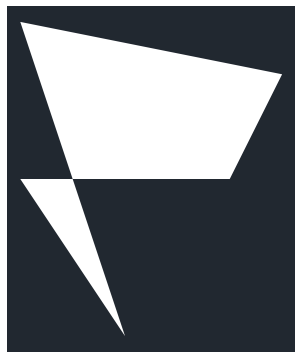

In [ ]:
dwg, msp, mask_size = start_drawing(**dxf_params)
hatch = msp.add_hatch(color=7)
hatch.paths.add_polyline_path(
    [
        (5, 2),
        (0, 3),
        (2, -3),
        (0, 0),
        (4, 0),
    ],
    is_closed=1,
    flags=ezdxf.const.BOUNDARY_PATH_EXTERNAL,
)

draw(dwg, msp)

## Bulge

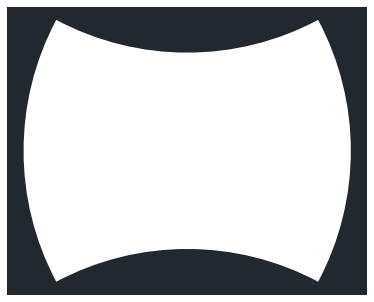

In [ ]:
dwg, msp, mask_size = start_drawing(**dxf_params)
hatch = msp.add_hatch(color=7)
hatch.paths.add_polyline_path(
    [(0,0,-.25), (0,1,.25), (1,1,-.25), (1,0,.25)], is_closed=True)
draw(dwg, msp)

# Spline


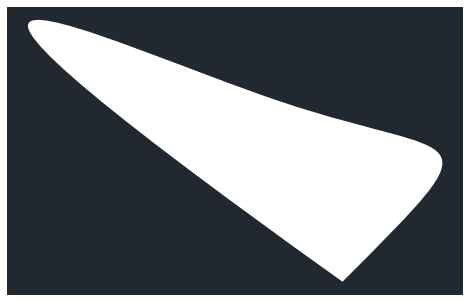

In [ ]:
dwg, msp, mask_size = start_drawing(**dxf_params)

hatch = msp.add_hatch(color=7)
edge_path = hatch.paths.add_edge_path(flags=ezdxf.const.BOUNDARY_PATH_OUTERMOST)

# 2. edge path
edge_path.add_spline(
    control_points=[
        (0, 0),
        (2, 2),
        (1, 1),
        (-7, 5),
        (0, 0),
    ],)

draw(dwg, msp)



In [ ]:
from ezdxf.math import Vec3, estimate_tangents


# Associative Boundary Paths¶

A HATCH entity can be associative to a base geometry, which means if the base geometry is edited in a CAD application the HATCH get the same modification. Because ezdxf is not a CAD application, this association is not maintained nor verified by ezdxf, so if you modify the base geometry afterwards the geometry of the boundary path is not updated and no verification is done to check if the associated geometry matches the boundary path, this opens many possibilities to create invalid DXF files: USE WITH CARE.


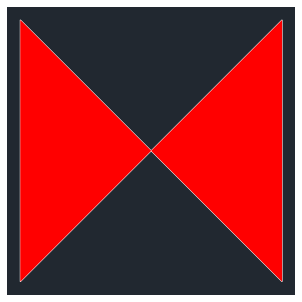

In [ ]:
dwg, msp, mask_size = start_drawing(**dxf_params)

# Create base geometry
lwpolyline = msp.add_lwpolyline(
    [(0, 0), (5, 5), (10, 0), (10, 10), (5, 5), (0, 10)],
    format="xyb",
    close=True,
)

hatch = msp.add_hatch(color=1)
path = hatch.paths.add_polyline_path(
    # get path vertices from associated LWPOLYLINE entity
    lwpolyline.get_points(format="xyb"),
    # get closed state also from associated LWPOLYLINE entity
    is_closed=True,
)

# Set association between boundary path and LWPOLYLINE
hatch.associate(path, [lwpolyline])
draw(dwg, msp)

# Petal lens

In [ ]:
r0=(0,0) 
focal=100*mm
delta_f=20*mm 
diameter=2*mm
num_petals=16
wavelength=0.5*um
num_pixels=512
has_background=True
has_draw=True
"""_summary_

Args:
    r0 (_type_): _description_
    focal (_type_): _description_
    delta_f (_type_): _description_
    diameter (_type_): _description_
    num_petals (_type_): _description_
    wavelength (_type_): _description_
    num_pixels (int, optional): _description_. Defaults to 512.
    has_draw (bool): If True draws, otherwise does nothing.
"""


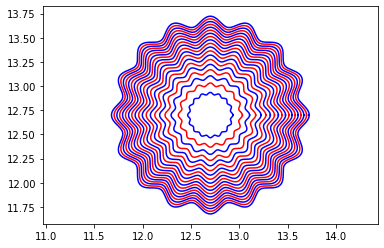

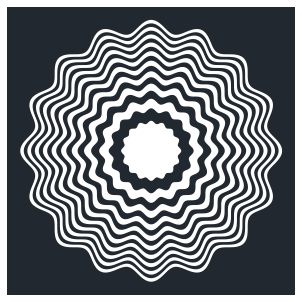

In [ ]:
dwg, msp, mask_size = start_drawing(**dxf_params)

x0, y0 = r0

num_radii = int(diameter**2/(4*wavelength*focal))

ns = np.arange(0, num_radii)
radii = np.sqrt(wavelength*focal*ns+0.25*ns**2*wavelength**2)

if num_radii/2 != int(num_radii/2):
    ns = ns[0:-1]

angle = np.linspace(0, 2*np.pi, num_pixels)
Angle, Ns = np.meshgrid(angle, ns)

Focal = focal + delta_f/2 * np.cos(Angle*num_petals)
Radii = np.sqrt(wavelength*Focal*Ns+0.25*Ns**2*wavelength**2)


if has_draw:
    plt.figure()
    plt.axis('equal')

for i in ns[::2]:
    ri1 = Radii[i, :]
    ri2 = Radii[i+1, :]
    xi1 = x0 + mask_size[0]/2 + ri1 * np.cos(angle)
    yi1 = y0 + mask_size[1]/2 + ri1 * np.sin(angle)
    xi2 = x0 + mask_size[0]/2 + ri2 * np.cos(angle)
    yi2 = y0 + mask_size[1]/2 + ri2 * np.sin(angle)

    if has_draw:
        plt.plot(xi1, yi1, 'r')
        plt.plot(xi2, yi2, 'b')

    points_1 = np.vstack((xi1, yi1)).transpose()
    points_2 = np.vstack((xi2, yi2)).transpose()

    # by default a solid fill hatch with fill color=7 (white/black)
    hatch = msp.add_hatch(
        color=7,
        dxfattribs={
            "hatch_style": ezdxf.const.HATCH_STYLE_NESTED,
            # 0 = nested: ezdxf.const.HATCH_STYLE_NESTED
            # 1 = outer: ezdxf.const.HATCH_STYLE_OUTERMOST
            # 2 = ignore: ezdxf.const.HATCH_STYLE_IGNORE
        },
    )

    # The first path has to set flag: 1 = external
    # flag const.BOUNDARY_PATH_POLYLINE is added (OR) automatically

    hatch.paths.add_polyline_path(points_1,
                                    is_closed=True,
                                    flags=ezdxf.const.BOUNDARY_PATH_OUTERMOST,
                                    )
    hatch.paths.add_polyline_path(points_2,
                                    is_closed=True,
                                    flags=ezdxf.const.BOUNDARY_PATH_EXTERNAL,
                                    # The second path has to set flag: 16 = outermost
                                    )

draw(dwg, msp)
dwg.saveas('lotus.dxf')
